# Расчет проводимости трубопроводов с помощью МУК

In [1]:
import os
import math
import numpy  as np
import pandas as pd
from graph import Graph #собственный класс для графиков
from matplotlib  import pyplot as plt
from rectangular import Rectangular, elementary

## Тестирование

### Проверка элементарного УК

In [2]:
def angles(num = 5):
    #зависимость элементарного УК от угла
    c_i = [1/2, 0, 1/2]
    c_j = [1/2, 1, 1/2]
    n_i = [0,1,0]
    angle_ar = np.linspace(0,2,num)*math.pi
    
    x, y = np.sin(angle_ar), np.cos(angle_ar)
    Y    = []
    for i in range(num):
        n_j = [x[i], y[i], 0]
        X   = angle_ar/math.pi
        Y.append(elementary(c_i,c_j,n_i,n_j,0.05))
    
    graph = Graph()
    graph.customize_graph("Зависимость  элем-го УК от угла", "Угол, rad/pi")
    plt.plot(X,Y)
    graph.save("angle.png", "tests")
    return

def distance(num = 5):
    #зависимость  элем-го УК от расстояния
    c_i  = [1/2, 0, 1/2]
    n_i  = [0,1,0]
    n_j  = [np.sin(math.pi/4), np.cos(math.pi/4),0]
    dist = np.linspace(0.5,10,num)
    Y    = []
    for d in dist:
        c_j = [1/2, d, 1/2]
        Y.append(elementary(c_i,c_j,n_i,n_j,0.05))
        
    graph = Graph()
    graph.customize_graph("Зависимость  элем-го УК от расстояния", "Расстояние")
    plt.plot(dist,Y)
    graph.save("distance.png", "tests")
    return

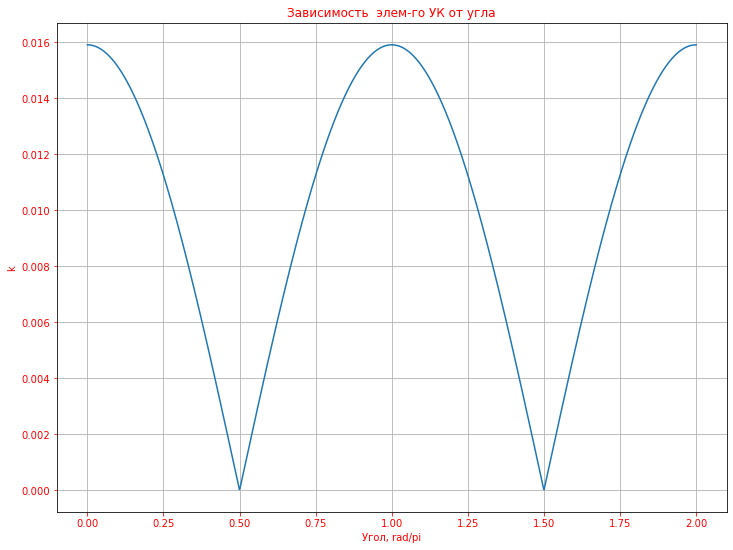

In [3]:
angles(1002)

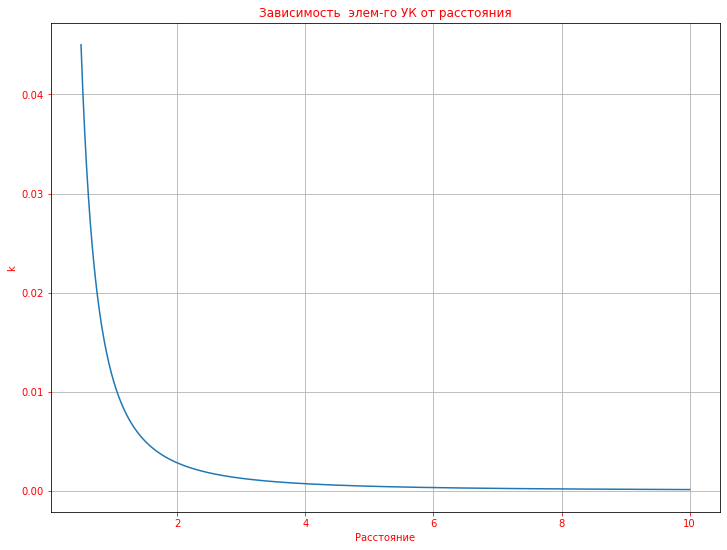

In [4]:
distance(1000)

### Проверка УК

In [5]:
def test_1(phi):
    #вывод всех пар УК.
    #phi_ij находится в i-й строке, j-м столбце.
    phi   = np.transpose(phi)
    table = pd.DataFrame({"0" : phi[0]})
    for i in range(1,len(phi)):
        table[str(i)] = phi[i]
    return table

def test_2(phi):
    #свойство замкнутости
    print("\n")
    for i in range(1,len(phi)):
        sum = 0
        for j in range(1, len(phi[i])):
            sum += phi[i][j]
        print("Сумма для " + str(i) + "-го эмиттера равна", sum)
    return

def test_3(t, num_1 = 100, num_2 = 100):
    #свойство взаимности
    phi = t.matrix(num_1, num_2)
    for i in range(1, len(phi)):
        for j in range(1, len(phi[i])):
            if round(phi[i][j] * t.areas[i-1],5) != round(phi[j][i] * t.areas[j-1],5):
                print("Свойство взаимности не выполнено для i =", i, "и j =", j)
    print("\n")   
    return

def test_4(t, num_1 = 100, num_2 = 100):
    #свойство аддитивности
    phi = t.matrix(num_1, num_2)
    for i in range(1,len(phi)):
        for j in range(1,len(phi[i])):
            if i == j:
                break
            centers_j = t.breaking[j-1](t.a,t.b,num_2,t.L)
            num_j     = len(centers_j)
            normal_j  = t.normals[j-1]
            cell_j    = t.areas[j-1] / num_j
            new_phi   = sum([t.to_other(i,collector,normal_j,cell_j,num_1) for collector in centers_j])
            if new_phi != phi[i][j]:
                print("Свойство аддитивности не выполнено для i=", i, "j=", j)
                print(new_phi, phi[i][j])
                print("")
    print("\n")
    return 

In [6]:
tube_1, tube_2 = Rectangular(1,1,1), Rectangular(1,5,1)
phi_1,  phi_2  = tube_1.matrix(100,100), tube_2.matrix(100,100)

In [7]:
print("phi для a = 1, b = 1, L = 1:")
display(test_1(phi_1))
test_2(phi_1)

phi для a = 1, b = 1, L = 1:


,0,1,2,3,4,5,6
0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,0.0,0.00000,0.20043,0.21344,0.21344,0.21344,0.21344
2,0.0,0.20043,0.00000,0.21344,0.21344,0.21344,0.21344
3,0.0,0.21344,0.21344,0.00000,0.21344,0.20043,0.21344
4,0.0,0.21344,0.21344,0.21344,0.00000,0.21344,0.20043
5,0.0,0.21344,0.21344,0.20043,0.21344,0.00000,0.21344
6,0.0,0.21344,0.21344,0.21344,0.20043,0.21344,0.00000




Сумма для 1-го эмиттера равна 1.054188331101996
Сумма для 2-го эмиттера равна 1.0541883311019964
Сумма для 3-го эмиттера равна 1.0541883311019962
Сумма для 4-го эмиттера равна 1.0541883311019957
Сумма для 5-го эмиттера равна 1.054188331101996
Сумма для 6-го эмиттера равна 1.0541883311019964


In [8]:
print("phi для a = 1, b = 5, L = 1:")
display(test_1(phi_2))
test_2(phi_2)

phi для a = 1, b = 5, L = 1:


,0,1,2,3,4,5,6
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.000000,0.379242,0.044346,0.329258,0.052114,0.283453
2,0.0,0.379242,0.000000,0.044346,0.283453,0.052114,0.271298
3,0.0,0.221730,0.221730,0.000000,0.221730,0.012407,0.221730
4,0.0,0.329258,0.283453,0.044346,0.000000,0.052114,0.379242
5,0.0,0.260569,0.260569,0.012407,0.260569,0.000000,0.260569
6,0.0,0.283453,0.271298,0.044346,0.379242,0.052114,0.000000




Сумма для 1-го эмиттера равна 1.0884116376361948
Сумма для 2-го эмиттера равна 1.0304522654253092
Сумма для 3-го эмиттера равна 0.8993265839356906
Сумма для 4-го эмиттера равна 1.0884116376361948
Сумма для 5-го эмиттера равна 1.0546849536963478
Сумма для 6-го эмиттера равна 1.0304522654253092


In [9]:
test_3(tube_1)
test_3(tube_2)

In [10]:
test_4(tube_1)
test_4(tube_2)

Свойство аддитивности не выполнено для i= 2 j= 1
20.042981274394034 0.20042981274394034

Свойство аддитивности не выполнено для i= 3 j= 1
21.343962958951387 0.2134396295895139

Свойство аддитивности не выполнено для i= 3 j= 2
21.343962958951394 0.21343962958951396

Свойство аддитивности не выполнено для i= 4 j= 1
21.343962958951387 0.21343962958951387

Свойство аддитивности не выполнено для i= 4 j= 2
21.3439629589514 0.21343962958951396

Свойство аддитивности не выполнено для i= 4 j= 3
21.343962958951398 0.21343962958951385

Свойство аддитивности не выполнено для i= 5 j= 1
21.34396295895138 0.2134396295895138

Свойство аддитивности не выполнено для i= 5 j= 2
21.34396295895139 0.21343962958951387

Свойство аддитивности не выполнено для i= 5 j= 3
20.042981274394034 0.20042981274394034

Свойство аддитивности не выполнено для i= 5 j= 4
21.343962958951376 0.2134396295895139

Свойство аддитивности не выполнено для i= 6 j= 1
21.343962958951394 0.213439629589514

Свойство аддитивности не выпол

### Проверка коэффициента Клаузинга

In [11]:
def test_5(t, num_1 = 100, num_2 = 100):
    #меньше ли 1
    print("Коэффициент Клаузинга меньше единицы", t.clausing(num_1,num_2) <= 1)
    print("\n")
    return

def test_6(t, num_1 = 100, num_2 = 100):
    #больше ли 0
    print("Коэффициент Клаузинга больше нуля", t.clausing(num_1,num_2) >= 0)
    print("\n")
    return

In [12]:
test_5(tube_1)
test_5(tube_2)

Коэффициент Клаузинга меньше единицы True


Коэффициент Клаузинга меньше единицы True




In [13]:
test_6(tube_1)
test_6(tube_2)

Коэффициент Клаузинга больше нуля True


Коэффициент Клаузинга больше нуля True




### Графики

In [14]:
#ф-ция строит кривую на графике
#и сохраняет его
def lines(x, k, filename = "", dirname = ""):
    plt.scatter(x, k, marker="o")
    plt.plot(x, k)
    
    plt.legend()
    Graph().save(filename, dirname)
    return

#ф-ция строит, называет,
#выводит и сохраняет 2 графика
#для разных прямоугольных сечений
def draw(num_1 = 10, num_2 = 10):
    x   = range(1,11)
    k_1 = [Rectangular(1,1,element).clausing(num_1, num_2) for element in x]
    
    graph = Graph()
    graph.customize_graph("Проводимость в прямоугольном сечении при b = 1", "L")
    lines(x, k_1, "b1.png", "rectangular")
    plt.show()
    
    k_2 = [Rectangular(1,5,element).clausing(num_1, num_2) for element in x]
    graph.customize_graph("Проводимость в прямоугольном сечении при b = 5", "L")
    lines(x, k_2, "b5.png", "rectangular")
    plt.show()
    return

In [ ]:
draw(100,100)